In [1]:
import pickle

In [2]:
all_documents = pickle.load( open( "all_documents.pkl", "rb" ) )

In [3]:
all_documents.keys()

dict_keys(['essays/week1_1.txt', 'essays/week1_380.txt', 'essays/week1_summary.docx', 'essays/week2_Summary Week 2.docx', 'essays/week1_Data Wrangling Chap 2.docx', 'essays/week2_summary-Data Wrangling with Python  ch2 p17 to 40.docx', 'essays/week2_Week 2 - Summary of DATA WRANGLING WITH PYTHON Chapter 2.docx', 'essays/week2_Data Wrangling with Python page 17 to 40.docx', 'essays/week1_a Very Short History Of Data Science_1.docx', 'essays/week2_Lists and Dictionaries Summary.docx', 'essays/week2_Data601-Reading Assignment_2.docx', 'essays/week1_a History of Data Science.docx', 'essays/week1_Assignment1.docx', 'essays/week1_reading Summary.docx', 'essays/week1_A Very Short History Of Data Science.docx', 'essays/week1_Data 601- Summary of The History of Data Science .docx', 'essays/week1_50 Years Data Science Summary.docx', 'essays/week2_Summary on Chapter 2 of Data Wrangling in Python.docx', 'essays/week2_Week 2 Reading Summary.docx', 'essays/Week2_summary.docx', 'essays/week1_summary-

Rather than consider the words per document, lets look at all of them

In [4]:
all_the_words=""
for file_path,content in all_documents.items():
    all_the_words+=content
    all_the_words+=" "

In [5]:
all_the_words[0:40]

'Gill Press’s A Very Short History of Dat'

In [6]:
all_the_words=all_the_words.lower()

In [7]:
all_the_words[0:40]

'gill press’s a very short history of dat'

In [8]:
list_of_words=all_the_words.split(" ")

In [9]:
len(list_of_words)

10186

In [10]:
len(set(list_of_words))

1795

https://stackoverflow.com/questions/4371231/removing-punctuation-from-python-list-items

In [11]:
import string
list_of_words = [''.join(ch for ch in st if ch in string.ascii_lowercase) for st in list_of_words]

an expanded version 

In [12]:
list_of_words_without_punctuation=[]
for this_string in list_of_words:
    new_list_of_char=[]
    for this_char in this_string:
        if (this_char in string.ascii_lowercase):
            new_list_of_char.append(this_char)
    new_string=''.join(new_list_of_char)
    list_of_words_without_punctuation.append(new_string)

In [13]:
len(set(list_of_words))

1375

https://stackoverflow.com/questions/3845423/remove-empty-strings-from-a-list-of-strings

In [14]:
list_of_words = list(filter(None, list_of_words))

In [15]:
len(list_of_words)

8793

In [16]:
len(set(list_of_words))

1374

In [17]:
max(set(list_of_words), key=list_of_words.count)

'a'

https://stackoverflow.com/questions/10099602/how-to-get-the-10-most-frequent-strings-in-a-list-in-python

In [18]:
from collections import Counter

In [19]:
Counter(list_of_words).most_common(10)

[('a', 393),
 ('the', 355),
 ('e', 283),
 ('data', 266),
 ('t', 238),
 ('i', 232),
 ('and', 228),
 ('s', 220),
 ('of', 212),
 ('n', 181)]

https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [20]:
dict_of_count=Counter(list_of_words)
import operator
sorted_tuples = sorted(dict_of_count.items(), key=operator.itemgetter(1),reverse=True)

https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python

Alternatively, we could have told sort to reverse the list

In [21]:
sorted_tuples[-10:]

[('isnt', 1),
 ('hard', 1),
 ('wouldnt', 1),
 ('entry', 1),
 ('onto', 1),
 ('directory', 1),
 ('having', 1),
 ('hopefully', 1),
 ('class', 1),
 ('session', 1)]

Need to remove the stop words

In [22]:
!pip install nltk

    100% |████████████████████████████████| 1.5MB 139kB/s 
  Running setup.py bdist_wheel for nltk ... - \ | / - \ | / - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [25]:
filtered_word_list = [] 
for w in list_of_words: 
    if w not in en_stops: 
        filtered_word_list.append(w) 

In [26]:
len(filtered_word_list)

4819

In [27]:
len(set(filtered_word_list))

1265

In [28]:
Counter(filtered_word_list).most_common(10)

[('e', 283),
 ('data', 266),
 ('n', 181),
 ('c', 127),
 ('science', 126),
 ('r', 125),
 ('l', 95),
 ('h', 85),
 ('python', 60),
 ('f', 54)]

When I see a list of numbers, I seek a visualization of the data.

First we need to convert the dictionary to a list of values.

In [29]:
list_of_counts=[]
for word,count in dict(Counter(filtered_word_list)).items():
    list_of_counts.append(count)

In [30]:
import matplotlib.pylab as plt

Let's see what a histogram looks like

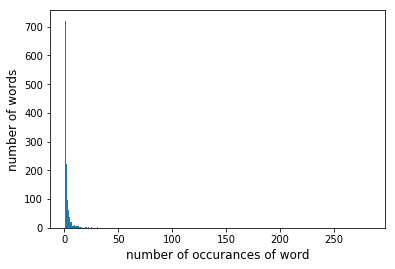

In [31]:
plt.hist(list_of_counts,bins=300)
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

There's a lot of rare words and a small number of words which appear often.

To get a better view, use the log of the y-axis.

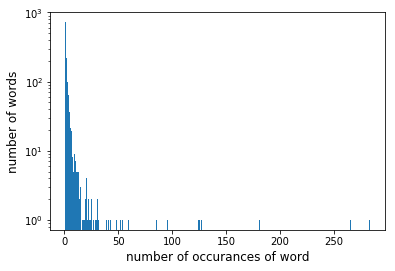

In [32]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

The semilogy histogram shows slightly more, but the few words that are frequent still skew the view.

Log for both y-axis and x-axis:

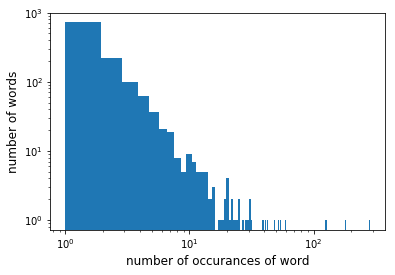

In [33]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposx='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

A straight line on a [log-log](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) axis is $$y=ax^k$$

https://en.wikipedia.org/wiki/Power_law

Well known feature of https://en.wikipedia.org/wiki/Zipf%27s_law

"Zipfian nature of word frequency distributions causes data sparseness problems." [source](http://sslmit.unibo.it/~baroni/publications/hsk_39_dist_rev2.pdf)

## So what?

The relevance is that we've stumbled into a verification that the text data really is text. If there were 10,000 documents, we wouldn't be able to inspect each document. Verifying that Zipf's law is applicable builds evidence that the documents are what we assume them to be.